In [1]:
# Dependencies
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import oscar speech csv
oscar_speech = pd.read_csv('../data/oscar_speech_db.csv')
oscar_speech.head()

,Year,Category,Film Title,Winner,Presenter,Date & Venue,Speech
0,1939 (12th) Academy Awards,Actress,Gone with the Wind,Vivien Leigh,Spencer Tracy,"February 29, 1940; Ambassador Hotel, Cocoanut ...","VIVIEN LEIGH:\r\nLadies and gentlemen, please..."
1,1939 (12th) Academy Awards,Actress in a Supporting Role,Gone with the Wind,Hattie McDaniel,Fay Bainter,"February 29, 1940; Ambassador Hotel, Cocoanut ...",HATTIE McDANIEL:\r\nAcademy of Motion Picture...
2,1941 (14th) Academy Awards,Actor in a Supporting Role,How Green Was My Valley,Donald Crisp,James Stewart,"February 26, 1942; Biltmore Hotel, Biltmore Bo...","DONALD CRISP:\r\nLadies and gentlemen, it's a..."
3,1941 (14th) Academy Awards,Actress,Suspicion,Joan Fontaine,Ginger Rogers,"February 26, 1942; Biltmore Hotel, Biltmore Bo...",JOAN FONTAINE:\r\nI want to thank the ladies ...
4,1941 (14th) Academy Awards,Actress in a Supporting Role,The Great Lie,Mary Astor,Ginger Rogers,"February 26, 1942; Biltmore Hotel, Biltmore Bo...","MARY ASTOR:\r\nLadies and gentlemen, twenty-t..."


In [3]:
# extract year from current "Year" column and append new column
oscar_speech[["Year_update", "Ceremony"]]= oscar_speech["Year"].str.split(" ", n = 1, expand = True)
#drop "none"
oscar_speech = oscar_speech[oscar_speech['Year_update']!="None"]
# convert to numeric
oscar_speech["Year_update"] = pd.to_numeric(oscar_speech["Year_update"])
#print dataframe
oscar_speech.sort_values(by=['Year_update'], ascending=False)

,Year,Category,Film Title,Winner,Presenter,Date & Venue,Speech,Year_update,Ceremony
1668,2016 (89th) Academy Awards,Honorary Award,None,"To Frederick Wiseman, whose masterful and dist...","Rory Kennedy, Ben Kingsley, Don Cheadle","November 12, 2016; The Governors Awards (Ray D...",FREDERICK WISEMAN:\r\nThank you. Thank you. I...,2016,(89th) Academy Awards
1654,2016 (89th) Academy Awards,Music (Original Score),La La Land,Justin Hurwitz,Samuel L. Jackson,"February 26, 2017; Dolby Theatre",JUSTIN HURWITZ:\r\nThank you so much to the A...,2016,(89th) Academy Awards
1641,2016 (89th) Academy Awards,Actor in a Leading Role,Manchester by the Sea,Casey Affleck,Brie Larson,"February 26, 2017; Dolby Theatre","CASEY AFFLECK:\r\nThat means so much to me, t...",2016,(89th) Academy Awards
1642,2016 (89th) Academy Awards,Actor in a Supporting Role,Moonlight,Mahershala Ali,Alicia Vikander,"February 26, 2017; Dolby Theatre",MAHERSHALA ALI:\r\n[Buttoning his jacket] My ...,2016,(89th) Academy Awards
1643,2016 (89th) Academy Awards,Actress in a Leading Role,La La Land,Emma Stone,Leonardo DiCaprio,"February 26, 2017; Dolby Theatre",EMMA STONE:\r\nThank you so much to the Acade...,2016,(89th) Academy Awards
...,...,...,...,...,...,...,...,...,...
13,1941 (14th) Academy Awards,Special Award,Fantasia,"To Walt Disney, William Garity, John N. A. Haw...",Mervyn LeRoy,"February 26, 1942; Biltmore Hotel, Biltmore Bo...",WALT DISNEY:\r\n[No speech.]\n,1941,(14th) Academy Awards
2,1941 (14th) Academy Awards,Actor in a Supporting Role,How Green Was My Valley,Donald Crisp,James Stewart,"February 26, 1942; Biltmore Hotel, Biltmore Bo...","DONALD CRISP:\r\nLadies and gentlemen, it's a...",1941,(14th) Academy Awards
3,1941 (14th) Academy Awards,Actress,Suspicion,Joan Fontaine,Ginger Rogers,"February 26, 1942; Biltmore Hotel, Biltmore Bo...",JOAN FONTAINE:\r\nI want to thank the ladies ...,1941,(14th) Academy Awards
1,1939 (12th) Academy Awards,Actress in a Supporting Role,Gone with the Wind,Hattie McDaniel,Fay Bainter,"February 29, 1940; Ambassador Hotel, Cocoanut ...",HATTIE McDANIEL:\r\nAcademy of Motion Picture...,1939,(12th) Academy Awards


In [4]:
#The transcripts use several different iterations of capitalization for "Music Begins", will run searches & combine

In [5]:
# new dfs for each sub search
df1 = oscar_speech
df2 = oscar_speech
df3 = oscar_speech
df4 = oscar_speech

In [6]:
#sub string search with first capitalization iteration
sub = "music begins"
df1["Indexes"] = df1["Speech"].str.find(sub)
music_cues1 = df1.loc[df1['Indexes'] != -1]
music_cues1.count()

Year            9
Category        9
Film Title      9
Winner          9
Presenter       9
Date & Venue    9
Speech          9
Year_update     9
Ceremony        9
Indexes         9
dtype: int64

In [7]:
#sub string search with second capitalization iteration - no results
sub = "music Begins"
df2["Indexes"] = df2["Speech"].str.find(sub)
music_cues2 = df2.loc[df2['Indexes'] != -1]
music_cues2.count()

Year            0
Category        0
Film Title      0
Winner          0
Presenter       0
Date & Venue    0
Speech          0
Year_update     0
Ceremony        0
Indexes         0
dtype: int64

In [8]:
#sub string search with third capitalization iteration - no results
sub = "Music Begins"
df3["Indexes"] = df3["Speech"].str.find(sub)
music_cues3 = df3.loc[df3['Indexes'] != -1]
music_cues3.count()

Year            0
Category        0
Film Title      0
Winner          0
Presenter       0
Date & Venue    0
Speech          0
Year_update     0
Ceremony        0
Indexes         0
dtype: int64

In [9]:
#sub string search with fourth capitalization iteration
sub = "Music begins"
df4["Indexes"] = df4["Speech"].str.find(sub)
music_cues4 = df4.loc[df4['Indexes'] != -1]
music_cues4.count()

Year            20
Category        20
Film Title      20
Winner          20
Presenter       20
Date & Venue    20
Speech          20
Year_update     20
Ceremony        20
Indexes         20
dtype: int64

In [10]:
#Eliminate duplicate "Ida" speech, transcript uses both "music begins" & "Music begins"
music_cues4 = music_cues4.loc[music_cues4["Film Title"] != "Ida"]

In [11]:
#combine
frames = [music_cues1, music_cues4]
combined_music_cues = pd.concat(frames)
combined_music_cues.count()

Year            28
Category        28
Film Title      28
Winner          28
Presenter       28
Date & Venue    28
Speech          28
Year_update     28
Ceremony        28
Indexes         28
dtype: int64

In [12]:
#create bins for each decade
bins = [0, 1930, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019]
bin_names = ["1939","1940-1949", "1950-1959", "1960-1969", "1970-1979", "1980-1989", "1990-1999", "2000-2009", "2010-2019"]

In [13]:
# bin by decade
combined_music_cues['Decades'] = pd.cut(combined_music_cues['Year_update'], bins, labels = bin_names)
# groupby decade
combined_music_cues_grouped = combined_music_cues.groupby('Decades')
# place decade totals into dataframe
counted_cues = combined_music_cues_grouped[['Year']].count()
cues = (counted_cues.apply(list).reset_index())

In [14]:
# variables
decades = np.arange(len(bin_names))
get_off_stage=cues.iloc[:,1].values

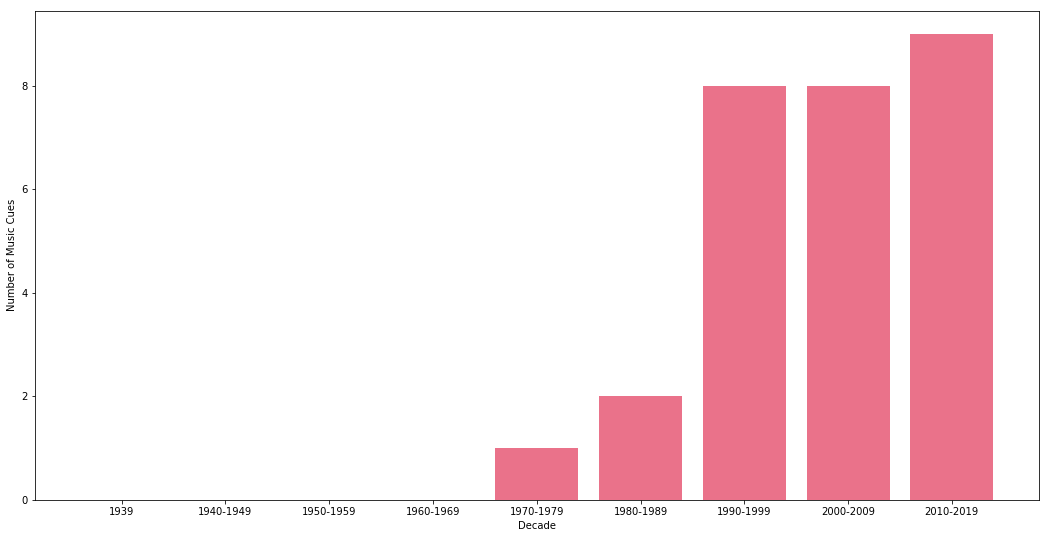

In [27]:
# plot

# sizing
plt.figure(figsize=(18,9))

# bars
plt.bar(decades, get_off_stage, alpha=0.6, color='crimson')

# labels
plt.xlabel('Decade')
plt.ylabel('Number of Music Cues')

# x-ticks
tick_locations = [value for value in decades]
plt.xticks(decades, bin_names)

# save
plt.savefig('../static/images/music_cues.png')

# show
plt.show()

In [28]:
#create no-speech df using sub search method
sub = "[No speech.]"
oscar_speech["Indexes"] = oscar_speech["Speech"].str.find(sub)
no_speech = oscar_speech.loc[oscar_speech['Indexes'] != -1]
no_speech.count()

Year            14
Category        14
Film Title      14
Winner          14
Presenter       14
Date & Venue    14
Speech          14
Year_update     14
Ceremony        14
Indexes         14
Word Count      14
dtype: int64

In [29]:
#bin by decade
no_speech['Decades'] = pd.cut(no_speech['Year_update'], bins, labels = bin_names)
#groupby decade
no_speech_grouped = no_speech.groupby('Decades')
# place decade totals into dataframe
no_speech_array = no_speech_grouped[['Year']].count()
no_speech_array = (no_speech_array.apply(list).reset_index())

/Users/Nathaniel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
# variables
decades = np.arange(len(bin_names))
shy_stars=no_speech_array.iloc[:,1].values

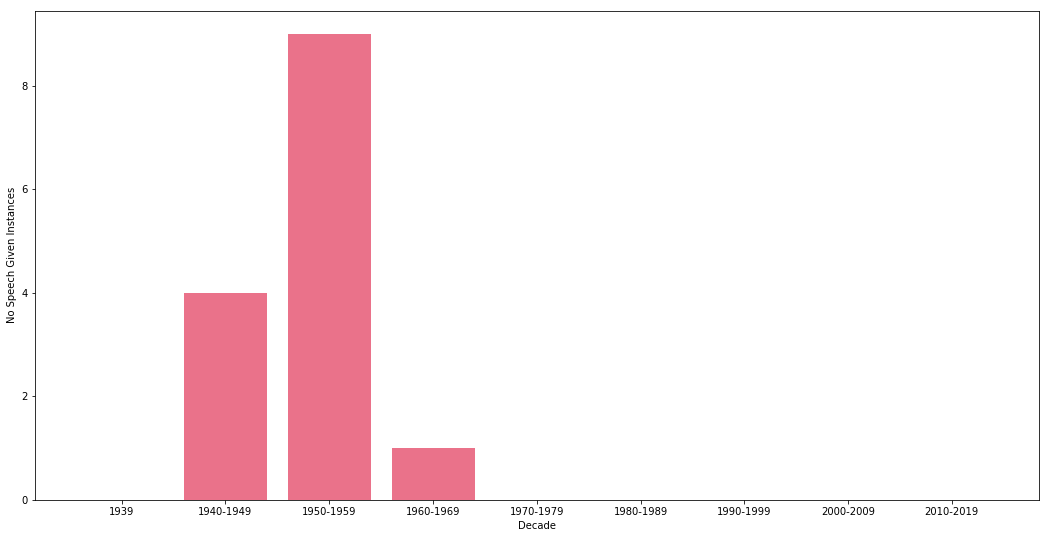

In [31]:
# plot

# sizing
plt.figure(figsize=(18,9))

# bars
plt.bar(decades, shy_stars, alpha=0.6, color='crimson')

# labels
plt.xlabel('Decade')
plt.ylabel('No Speech Given Instances')

# x-ticks
tick_locations = [value for value in decades]
plt.xticks(decades, bin_names)

# save
plt.savefig('../static/images/no_speech.png')

# show
plt.show()

In [32]:
# create word counts column to measure speech length
oscar_speech_length = oscar_speech
oscar_speech_length["Word Count"] = oscar_speech['Speech'].str.split().str.len()
oscar_speech_length = oscar_speech_length.drop(columns=['Indexes'])

In [33]:
#bin by decade
oscar_speech_length['Decades'] = pd.cut(oscar_speech_length['Year_update'], bins, labels = bin_names)
#groupby decade
oscar_speech_length_grouped = oscar_speech_length.groupby('Decades')
# place decade mean speech length into dataframe
avg_oscar_speech = oscar_speech_length_grouped[['Word Count']].mean()
avg_oscar_speech

,Word Count
Decades,
1939,NaN
1940-1949,93.940000
1950-1959,49.554622
1960-1969,52.960145
1970-1979,103.692308
1980-1989,134.733068
1990-1999,154.964286
2000-2009,169.948413
2010-2019,267.544974


In [34]:
# place into array for plotting
avg_oscar_speech = (avg_oscar_speech.apply(list).reset_index())
avg_oscar_speech

,Decades,Word Count
0,1939,NaN
1,1940-1949,93.940000
2,1950-1959,49.554622
3,1960-1969,52.960145
4,1970-1979,103.692308
5,1980-1989,134.733068
6,1990-1999,154.964286
7,2000-2009,169.948413
8,2010-2019,267.544974


In [35]:
# variables
decades = np.arange(len(bin_names))
talking_stars=avg_oscar_speech.iloc[:,1].values

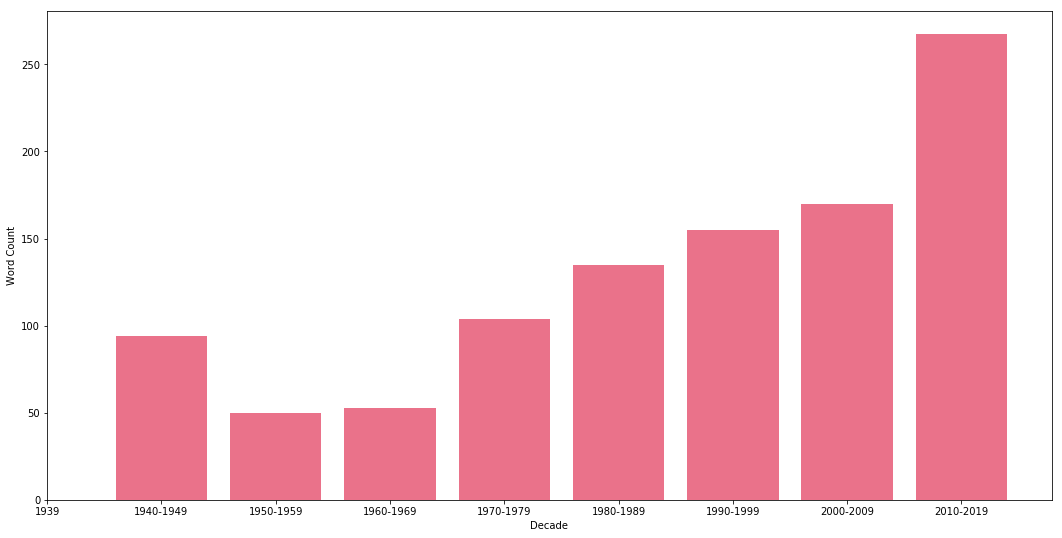

In [36]:
# plot

# sizing
plt.figure(figsize=(18,9))

# bars
plt.bar(decades, talking_stars, alpha=0.6, color='crimson')

# labels
plt.xlabel('Decade')
plt.ylabel('Word Count')

# x-ticks
tick_locations = [value for value in decades]
plt.xticks(decades, bin_names)

# save
plt.savefig('../static/images/avg_speech_length.png')

# show
plt.show()